In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [8]:
from tensorflow.keras.layers import Dense, Activation, Conv2D,Conv1D, Flatten,MaxPooling2D,BatchNormalization,Lambda, AveragePooling2D, MaxPooling1D
import tensorflow.keras.backend as K
from tensorflow.keras.layers import LSTM,Input,Bidirectional,Dense, Conv1D,MaxPooling1D,Flatten,Dropout,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

In [9]:
df_X = pd.read_csv('dataset/train_features.csv')
df_y = pd.read_csv('dataset/train_target.csv')

In [10]:
def data_processing(data_frame,feature_list,conc_list=list()):
    for feature in feature_list:
        conc_list.append(np.asarray(data_frame[feature]).reshape(-1,375,1))
    conc_array = np.concatenate(conc_list,axis=2)
    array = conc_array.transpose(0,1,2)
    return array

In [11]:
data = data_processing(df_X,['S1','S2','S3','S4'])

In [12]:
y = df_y.drop(['id','X','Y','M'],axis=1)
y_numpy = y.to_numpy()
y_list = y_numpy.tolist()

In [13]:
x_array = data
y_array = y_list
train_test_index = int(len(x_array)*0.8)
zip_list = list(zip(x_array,y_array))
random.shuffle(zip_list)
x_array,y_array = zip(*zip_list)
x_train,y_train = np.array(x_array[0:train_test_index]),np.array(y_array[0:train_test_index])
x_test,y_test = np.array(x_array[train_test_index:]),np.array(y_array[train_test_index:])

In [14]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = Scaler.fit_transform(y_train)
y_test_scaled = Scaler.fit_transform(y_test)
y_train_scaled

array([[0.25],
       [0.75],
       [0.  ],
       ...,
       [0.  ],
       [0.25],
       [1.  ]])

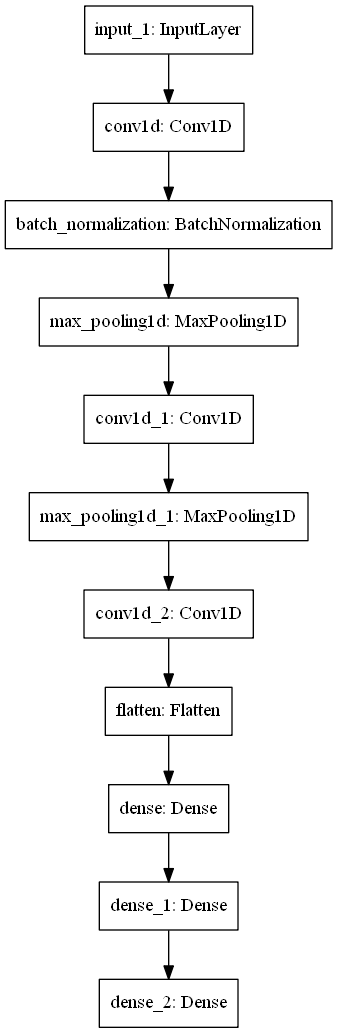

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [16]:
model= Sequential(
    [
        Input(shape=(x_train.shape[1],x_train.shape[2])),
        Conv1D(32, 2, activation="relu"),
        BatchNormalization(),
        MaxPooling1D(3),
        Conv1D(32,2, activation="relu"),
        MaxPooling1D(2),
        Conv1D(32,2, activation="relu"),
        Flatten(),
        Dense(64, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1,activation='sigmoid')
    ]
)

In [6]:
def my_loss(y_true, y_pred):
    return K.mean(K.square(y_true-y_pred))/2e+04

In [61]:
model.compile(loss=my_loss,optimizer='adam',metrics=['mean_absolute_error'])

In [62]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor ="val_mean_absolute_error", 
                                        mode ="min", patience = 50, 
                                        restore_best_weights = True)

In [63]:
model.fit(x_train,y_train,validation_split=0.2,epochs=500,callbacks=[early_stopping])

Epoch 1/500
56/56 [==============================] - 2s 16ms/step - loss: 2.2997e-06 - mean_absolute_error: 0.1789 - val_loss: 3.0438e-06 - val_mean_absolute_error: 0.2112
Epoch 2/500
56/56 [==============================] - 1s 12ms/step - loss: 6.0569e-07 - mean_absolute_error: 0.0898 - val_loss: 8.0776e-07 - val_mean_absolute_error: 0.1081
Epoch 3/500
56/56 [==============================] - 1s 13ms/step - loss: 3.7771e-07 - mean_absolute_error: 0.0694 - val_loss: 2.8470e-07 - val_mean_absolute_error: 0.0615
Epoch 4/500
56/56 [==============================] - 1s 13ms/step - loss: 3.1574e-07 - mean_absolute_error: 0.0629 - val_loss: 2.1939e-07 - val_mean_absolute_error: 0.0526
Epoch 5/500
56/56 [==============================] - 1s 13ms/step - loss: 3.6445e-07 - mean_absolute_error: 0.0689 - val_loss: 1.7358e-07 - val_mean_absolute_error: 0.0475
Epoch 6/500
56/56 [==============================] - 1s 12ms/step - loss: 1.9402e-07 - mean_absolute_error: 0.0494 - val_loss: 2.5688e-07 - 

56/56 [==============================] - 1s 19ms/step - loss: 7.0990e-08 - mean_absolute_error: 0.0275 - val_loss: 3.1725e-08 - val_mean_absolute_error: 0.0179
Epoch 96/500
56/56 [==============================] - 1s 17ms/step - loss: 5.7720e-08 - mean_absolute_error: 0.0242 - val_loss: 2.2434e-08 - val_mean_absolute_error: 0.0153
Epoch 97/500
56/56 [==============================] - 1s 19ms/step - loss: 7.7314e-08 - mean_absolute_error: 0.0295 - val_loss: 2.3817e-08 - val_mean_absolute_error: 0.0168
Epoch 98/500
56/56 [==============================] - 1s 17ms/step - loss: 6.8858e-08 - mean_absolute_error: 0.0268 - val_loss: 3.7185e-08 - val_mean_absolute_error: 0.0220
Epoch 99/500
56/56 [==============================] - 1s 18ms/step - loss: 8.3163e-08 - mean_absolute_error: 0.0308 - val_loss: 3.2349e-08 - val_mean_absolute_error: 0.0185
Epoch 100/500
56/56 [==============================] - 1s 16ms/step - loss: 8.6023e-08 - mean_absolute_error: 0.0313 - val_loss: 2.5056e-08 - val_me

56/56 [==============================] - 1s 14ms/step - loss: 9.2522e-08 - mean_absolute_error: 0.0294 - val_loss: 2.8531e-08 - val_mean_absolute_error: 0.0153
Epoch 190/500
56/56 [==============================] - 1s 15ms/step - loss: 6.8223e-08 - mean_absolute_error: 0.0258 - val_loss: 1.7454e-08 - val_mean_absolute_error: 0.0137
Epoch 191/500
56/56 [==============================] - 1s 14ms/step - loss: 5.3510e-08 - mean_absolute_error: 0.0234 - val_loss: 1.8355e-08 - val_mean_absolute_error: 0.0131
Epoch 192/500
56/56 [==============================] - 1s 14ms/step - loss: 4.3870e-08 - mean_absolute_error: 0.0213 - val_loss: 4.0722e-08 - val_mean_absolute_error: 0.0196
Epoch 193/500
56/56 [==============================] - 1s 14ms/step - loss: 7.2136e-08 - mean_absolute_error: 0.0259 - val_loss: 2.1503e-08 - val_mean_absolute_error: 0.0145
Epoch 194/500
56/56 [==============================] - 1s 14ms/step - loss: 4.2374e-08 - mean_absolute_error: 0.0193 - val_loss: 3.1751e-08 - va

56/56 [==============================] - 1s 14ms/step - loss: 7.6636e-08 - mean_absolute_error: 0.0261 - val_loss: 2.5146e-08 - val_mean_absolute_error: 0.0168
Epoch 284/500
56/56 [==============================] - 1s 14ms/step - loss: 8.7657e-08 - mean_absolute_error: 0.0273 - val_loss: 1.9598e-08 - val_mean_absolute_error: 0.0142
Epoch 285/500
56/56 [==============================] - 1s 15ms/step - loss: 7.6823e-08 - mean_absolute_error: 0.0259 - val_loss: 2.0806e-08 - val_mean_absolute_error: 0.0154
Epoch 286/500
56/56 [==============================] - 1s 15ms/step - loss: 5.1188e-08 - mean_absolute_error: 0.0201 - val_loss: 1.9239e-08 - val_mean_absolute_error: 0.0156
Epoch 287/500
56/56 [==============================] - 1s 14ms/step - loss: 6.7356e-08 - mean_absolute_error: 0.0254 - val_loss: 2.2437e-08 - val_mean_absolute_error: 0.0137


# 0.2 to 1

In [64]:
model.evaluate(x_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 1.9235e-08 - mean_absolute_error: 0.0120


[1.9235152137753175e-08, 0.011954731307923794]

In [65]:
ans = model.predict(np.expand_dims(x_test[0],axis=0))

In [68]:
model.save('model/model_v.h5')